In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
with zp.ZipFile('archive.zip') as a:
    with a.open('hotel_bookings.csv') as hot:
        data_hotel = pd.read_csv(hot)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel = data_hotel.sample(n=50000,random_state = 42).reset_index()

In [6]:
hotel.isnull().sum()

index                                 0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             209
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6842


## EDA

### TIPE-TIPE DATA

In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           50000 non-null  int64  
 1   hotel                           50000 non-null  object 
 2   is_canceled                     50000 non-null  int64  
 3   lead_time                       50000 non-null  int64  
 4   arrival_date_year               50000 non-null  int64  
 5   arrival_date_month              50000 non-null  object 
 6   arrival_date_week_number        50000 non-null  int64  
 7   arrival_date_day_of_month       50000 non-null  int64  
 8   stays_in_weekend_nights         50000 non-null  int64  
 9   stays_in_week_nights            50000 non-null  int64  
 10  adults                          50000 non-null  int64  
 11  children                        50000 non-null  float64
 12  babies                          

### DESCRIBE DATA & BEBERAPA DISTRIBUSI DATA

In [8]:
hotel.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43158.000000,2845.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,59653.212300,0.371600,104.030080,2016.157220,27.156940,15.802880,0.923300,2.491960,1.857600,0.102120,0.007960,0.031660,0.085060,0.137620,0.221220,86.665091,188.391564,2.26486,101.955308,0.061460,0.573240
std,34323.141624,0.483237,106.953591,0.708288,13.592113,8.754873,0.992168,1.896082,0.550898,0.396856,0.098065,0.175095,0.805951,1.494191,0.645205,110.807878,131.573433,17.43284,48.091588,0.241669,0.794083
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.00000,-6.380000,0.000000,0.000000
25%,30180.500000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.00000,69.182500,0.000000,0.000000
50%,59519.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.00000,95.000000,0.000000,0.000000
75%,89278.250000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.00000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,9.000000,1.000000,26.000000,72.000000,18.000000,531.000000,541.000000,391.00000,508.000000,3.000000,5.000000


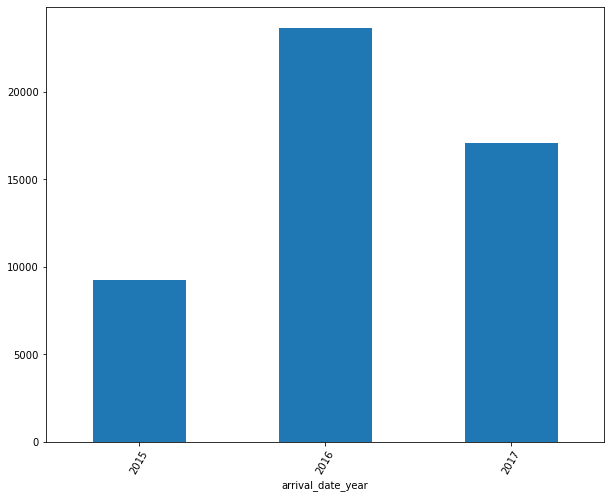

In [9]:
pengunjung_tahunan = hotel.groupby(['arrival_date_year'])['arrival_date_year'].count()
pengunjung_tahunan.plot( rot=60, kind='bar', figsize=(10,8));

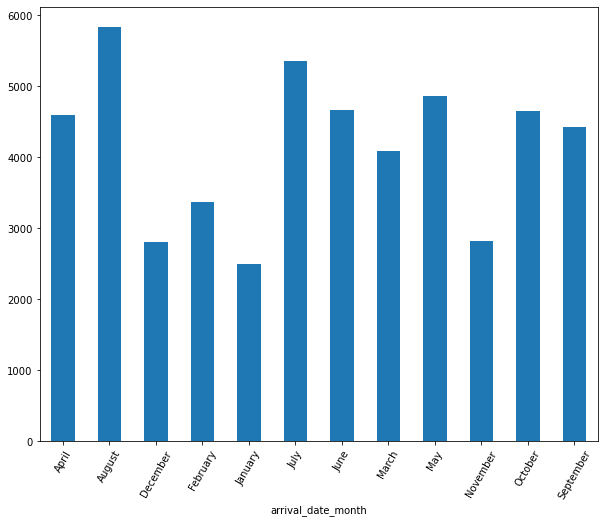

In [10]:
pengunjung_bulanan = hotel.groupby(['arrival_date_month'])['arrival_date_month'].count()
pengunjung_bulanan.plot( rot=60, kind='bar', figsize=(10,8));

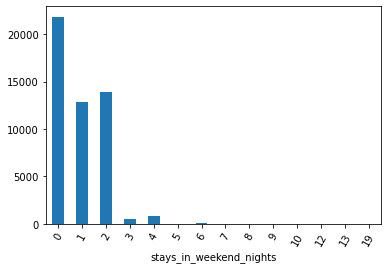

In [11]:
pengunjung_stay = hotel.groupby(['stays_in_weekend_nights'])['stays_in_weekend_nights'].count()
pengunjung_stay.plot( rot=60, kind='bar');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

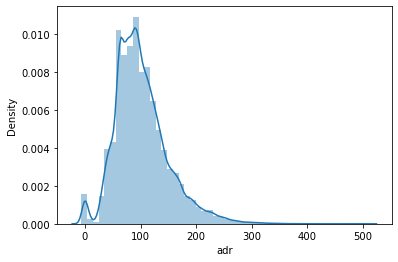

In [12]:
sns.distplot(hotel['adr'])

### TAMU BERASAL DARI MANA ?

In [13]:
hotel.groupby(['country']).count()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
AGO,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,114,3,159,159,159,159,159,159,159
ALB,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,1,7,7,7,7,7,7,7
AND,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5
ARE,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,0,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,13,2,15,15,15,15,15,15,15
VNM,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4
ZAF,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,28,1,33,33,33,33,33,33,33


tamu berasal dari 150 negara yang berbeda-beda. sesuai dengan hasil yang diatas

### BERAPA HARGA ROOM PER NIGHT ?


In [14]:
hotel.groupby(['reservation_status_date']).mean()['adr']

reservation_status_date
2014-10-17     62.800000
2015-01-01     61.968530
2015-01-02      0.000000
2015-01-20     76.500000
2015-01-21     36.675000
                 ...    
2017-09-06    142.584286
2017-09-07    143.850000
2017-09-08    102.725000
2017-09-09    147.778333
2017-09-10    144.535000
Name: adr, Length: 900, dtype: float64

### ADA PERBEDAAN HARGA KAH ?

terdapat perbedaan harga untuk setiap malamnya

### BERAPA LAMA TAMU TINGGAL DI HOTEL ?

In [15]:
hotel.groupby(['is_canceled']).count()['reservation_status_date']

is_canceled
0    31420
1    18580
Name: reservation_status_date, dtype: int64

lama tamu tinggal dihotel selama 31420 hari

### ADAKAH SEGMEN PASARNYA ?

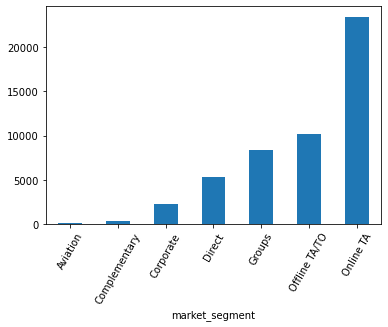

In [16]:
segmen_pasar = hotel.groupby(['market_segment'])['market_segment'].count()
segmen_pasar.plot( rot=60, kind='bar');

dari grafik yang disajikan diatas, dapat disimpulkan bahwa segemn pasar untuk reservasi hotel adalah pada **online TA**

### JUMLAH RESERVASI YANG DICANCEL DAN TIDAK DICANCEL

In [17]:
hotel.groupby(['is_canceled']).count()['index']

is_canceled
0    31420
1    18580
Name: index, dtype: int64

booking was canceled = 1, or not = 0
sehingga dapat disimpulkan bahwa pemesanan yang di batalkan ada sejumlah 18580 sedangkan untuk pesanan yang tidak di batalkan sejumlah 31420

### HANDLING MISSING VALUE

In [18]:
# cek missing value
hotel.isnull().sum()

index                                 0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             209
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6842


In [19]:
### persentase penyumbang missing value terbanyak
round(hotel.isnull().sum()/hotel.shape[0]*100, 2)

index                              0.00
hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.42
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.68


In [20]:
#drop company
hotel.drop('company', axis=1, inplace=True)

In [21]:
#drop company
hotel.drop('agent', axis=1, inplace=True)

In [22]:
hotel.isnull().sum()

index                               0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           209
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr         

company dan agent di hapus karena pada saat ini tidak memiliki dampak yang besar dalam penganalisisan bisnis hotel dan juga merupakan penyumbang terbesar untuk kasus missing value

### HANDLING OUTLIER

In [23]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [24]:
# mendeteksi semua nilai outlier pada adr
detect_outliers(hotel,'adr')

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
88,13370,Resort Hotel,1,46,2017,August,32,12,2,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,212.00,0,0,Canceled,2017-07-12
188,7336,Resort Hotel,1,23,2016,August,32,4,0,3,2,1.0,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,272.70,0,0,Canceled,2016-07-30
196,38800,Resort Hotel,0,149,2017,July,30,26,0,4,2,2.0,0,BB,CHE,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,211.25,0,0,Check-Out,2017-07-30
226,12786,Resort Hotel,1,21,2017,July,29,17,1,3,2,0.0,0,BB,MAR,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,230.00,0,1,Canceled,2017-06-29
252,12800,Resort Hotel,1,190,2017,July,29,17,2,5,3,0.0,0,Undefined,CHE,Direct,Direct,0,0,0,D,D,3,No Deposit,0,Transient,274.45,0,0,Canceled,2017-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49845,38991,Resort Hotel,0,188,2017,August,31,1,0,4,2,0.0,0,HB,FRA,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,0,Transient,248.50,0,2,Check-Out,2017-08-05
49869,69796,City Hotel,1,3,2017,June,23,6,2,6,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,289.88,0,0,Canceled,2017-06-06
49905,68691,City Hotel,1,165,2017,May,20,19,2,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,225.00,0,0,Canceled,2017-01-12
49972,13540,Resort Hotel,1,160,2017,August,33,19,2,3,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,238.00,0,0,Canceled,2017-03-12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adr'>

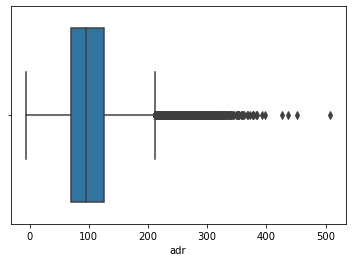

In [25]:
sns.boxplot(hotel['adr'])

In [26]:
#menseleksi nilai outlier yang terlalu jauh
hotel[hotel['adr']>400]

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1219,13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,2.0,0,FB,PRT,Direct,Direct,0,0,0,H,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
4701,103912,City Hotel,0,81,2016,December,53,31,1,1,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
6520,39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,2.0,0,Undefined,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09
25580,15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16


tidak perlu dihapus outlier yang terdapat pada kolom adr. karna hal ini akan berpngaruh pada pengklasifikasian random forest yang akan di kerjakan selanjutnya

### HANDLING DUPLICATES

In [27]:
hotel.duplicated().any()

False

In [28]:
hotel[hotel.duplicated()]

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


tidak ada data yang terduplikasi

### Handling data type errors

In [29]:
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           50000 non-null  int64  
 1   hotel                           50000 non-null  object 
 2   is_canceled                     50000 non-null  int64  
 3   lead_time                       50000 non-null  int64  
 4   arrival_date_year               50000 non-null  int64  
 5   arrival_date_month              50000 non-null  object 
 6   arrival_date_week_number        50000 non-null  int64  
 7   arrival_date_day_of_month       50000 non-null  int64  
 8   stays_in_weekend_nights         50000 non-null  int64  
 9   stays_in_week_nights            50000 non-null  int64  
 10  adults                          50000 non-null  int64  
 11  children                        50000 non-null  float64
 12  babies                          

tidak ada tipe data yang error

### ENCODE

In [30]:
lE = LabelEncoder()

In [31]:
hotel['reservation_status'] = lE.fit_transform(hotel['reservation_status'])

### CEK KORELASI

<AxesSubplot:>

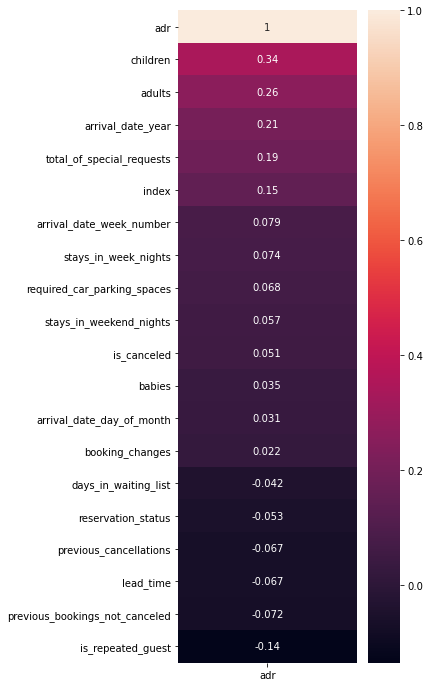

In [32]:
plt.figure(figsize=(4,12))
sns.heatmap(hotel.corr().sort_values('adr',ascending =False)[['adr']],annot=True)

nilai korelasi yang dimiliki adr untuk setiap kolom pada tabel yang tersaji sangat kecil. dimana paling besar korelasinya terletak pada kolom children dengan nilai 0.34

<AxesSubplot:>

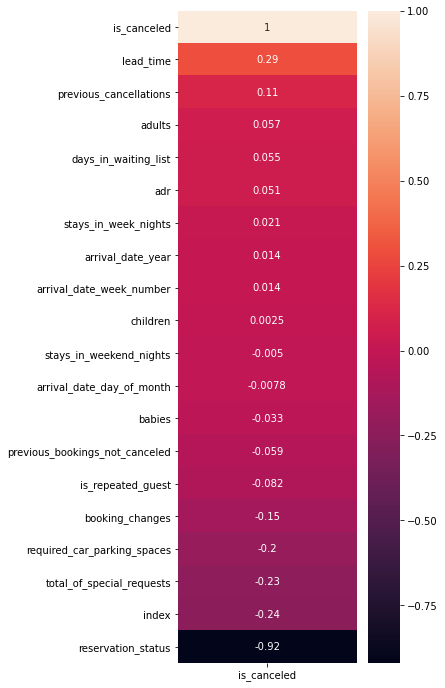

In [33]:
plt.figure(figsize=(4,12))
sns.heatmap(hotel.corr().sort_values('is_canceled',ascending =False)[['is_canceled']],annot=True)

nilai korelasi yang dimiliki is_canceled memiliki nilai yang besar dengan nilai reservation_status. sehingga disini menunjukan bahwa hubungan korelasi antara is_canceled dan reservation_status sangat kuat

### FEATURE SELECTION

In [34]:
hotel = hotel.drop(columns=['index','hotel','arrival_date_month','meal','country','market_segment','distribution_channel','deposit_type'])

In [35]:
hotel1 = hotel.drop(columns = ['reserved_room_type','assigned_room_type','customer_type','reservation_status_date'])

In [36]:
hotel1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,203,2016,49,2,2,5,2,0.0,0,0,0,0,4,0,66.8,0,0,1
1,1,82,2015,29,16,0,3,2,0.0,0,0,0,0,0,0,76.5,0,0,0
2,0,25,2016,53,27,0,3,3,0.0,0,0,0,0,2,0,60.0,0,1,1
3,0,1,2016,11,9,0,1,1,0.0,0,0,0,0,0,0,95.0,0,0,1
4,0,70,2017,16,16,2,2,2,0.0,0,0,0,0,0,0,108.0,0,0,1


reservation_status ----> 0 = canceled, 1 = check out

### BASELINE MODEL

In [37]:
x = hotel1.drop('is_canceled', axis=1)
y = hotel1['is_canceled']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

In [40]:
models = [rf, svm, lr]


In [41]:
for model in models:
    model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#evaluation
ypred_rf = rf.predict(x_test)
ypred_svm = svm.predict(x_test)
ypred_lr = lr.predict(x_test)

In [43]:
!pip install plot_metric

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6305
           1       1.00      1.00      1.00      3695

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



Text(33.0, 0.5, 'Actual Label')

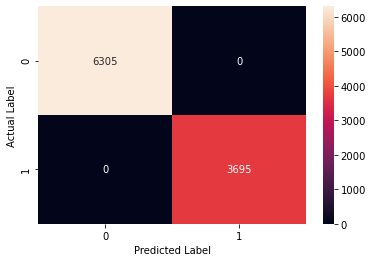

In [44]:
print(classification_report(y_test, ypred_rf))
sns.heatmap(confusion_matrix(y_test, ypred_rf), annot = True,fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6305
           1       1.00      1.00      1.00      3695

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



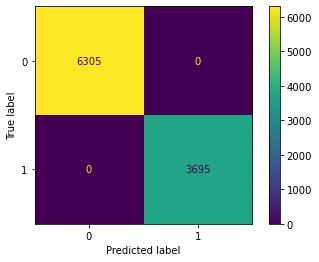

In [45]:
plot_confusion_matrix(rf, x_test, y_test)
print(classification_report(y_test, ypred_rf))
plt.grid(False)

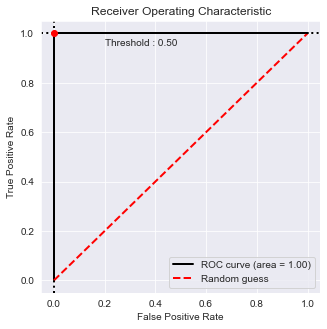

In [46]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.95      0.78      6305
           1       0.69      0.20      0.31      3695

    accuracy                           0.67     10000
   macro avg       0.68      0.57      0.55     10000
weighted avg       0.67      0.67      0.61     10000



Text(34.0, 0.5, 'Actual Label')

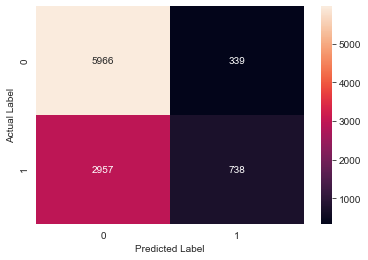

In [47]:
print(classification_report(y_test, ypred_svm))
sns.heatmap(confusion_matrix(y_test, ypred_svm), annot = True, fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.67      0.95      0.78      6305
           1       0.69      0.20      0.31      3695

    accuracy                           0.67     10000
   macro avg       0.68      0.57      0.55     10000
weighted avg       0.67      0.67      0.61     10000



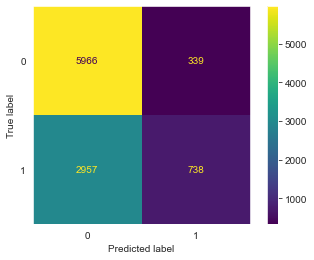

In [48]:
plot_confusion_matrix(svm, x_test, y_test)
print(classification_report(y_test, ypred_svm))
plt.grid(False)

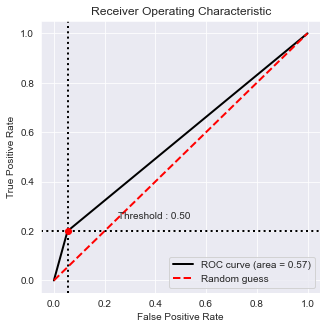

In [49]:
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6305
           1       0.96      0.87      0.92      3695

    accuracy                           0.94     10000
   macro avg       0.95      0.93      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Text(34.0, 0.5, 'Actual Label')

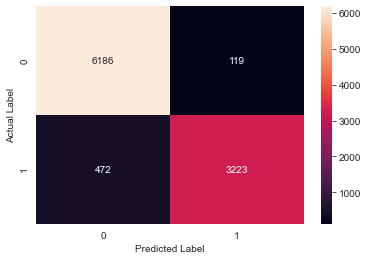

In [50]:
print(classification_report(y_test, ypred_lr))
sns.heatmap(confusion_matrix(y_test, ypred_lr), annot = True, fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6305
           1       0.96      0.87      0.92      3695

    accuracy                           0.94     10000
   macro avg       0.95      0.93      0.94     10000
weighted avg       0.94      0.94      0.94     10000



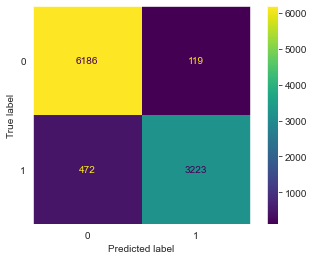

In [51]:
plot_confusion_matrix(lr, x_test, y_test)
print(classification_report(y_test, ypred_lr))
plt.grid(False)

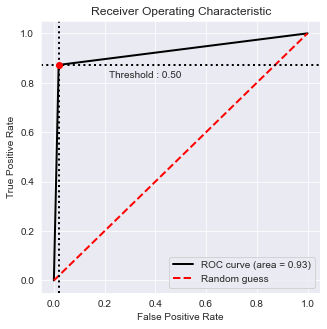

In [52]:
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [53]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [54]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(x, y)
    scores.append({
        'best_score': clf_random.best_score_,
    })
    
df = pd.DataFrame(scores,columns=['best_score'])
df

KeyboardInterrupt: 

### MODEL EVALUASI

salah satu faktor terbesar yang membuat sebuah hotel memiliki rugi yang besar adalah dengan tidak terprediksinya jumlah orang yang membatalkan pesanannya. hal ini dikarenakan akan memakan biaya perawatan kamar dan konsumsi dari pelanggan. selain itu juga, ketika suatu mesin learning salah memprediksi jumlahorang yang membatalakn pesanan kamarnya, ini bisa berdampak pula terhadap reputasi hotel. contohnya untuk kerugian biaya adalah ketika model mesin learning memprediksi bahwa hanya satu orang yang akan membatalkan pesanan pada hari ini. ternyata ada 3 orang yang membatalkan pesanan kamar hari ini, nah secara tidak langsung sisa 2 kamar yang sbeelumny telah di bersihkan dan makanan yang sbeelumnya telah disediakan menajdi mubazir dan sia-sia. sedangkan untuk kerugian reputasi adalah ketika mesin learning memprediksi ada 3 orang yang membatalkan pesanannya ternayta hanya 1 orang saja yang membatalkan pesanannya, nah 2 kamar yang seharusnya dibersihkan menajdi tidak terurus dan makanan yang seharusnya cukup untuk semua pelanggan menjadi kurang. hal inilah yang membuat reputasi dari perusahaan menjadi hancur, dan ini tentu sebuah kerugian.
maka dari itu diperlukan model terbaik yang bisa memprediksi secara akurat dan presisi atas pesanan yang akan di canceled.

**kesimpulan akhir**

dikarenakan kernel dari randomizedsearchcv nya gak jalan jalan. maka saya kaan menyimpulkan model yang paling oke berdasarkan confusion matrik yang telah tersaji.
untuk yang pertama dengan menggunakan model random forest. didapatkan smeua nilainya 1. untuk presisi dan recall nya. ini adalah nilai yang sempurna namun model ini tidak bisa digunkana karena takutnya mesin tidak bisa belajar sehingga ketika diberikan data yang berbeda lagi model tidak bisa mengidentifikasinya dengan benar.
yang kedua adalah dengan menggunakan model SVC. didapatkan nilai yang sangat kecil untuk presisi nya yakni senilai 0.69 untuk true canceled dan 0.67 untuk true uncanceled. karna nilai yang sangat kecil ini maka model SVC sangat tidak dianjurkan untuk digunakan.
yang ketiga adalah dengan menggunakan model logistic regresion. didapatkan nilai yang tinggi untuk presisi dan recallnya. sedangkan data yang digunakan juga seimbang atau balance. hal ini yang menjadikan model untuk logistic regression adalah model yang paling baik untuk digunakan

**error yang harus ditekan**

error yang harus ditekan adlah error pada true canceled karena akan berefek pada kerugian biaya dan reputasi hotel.